### Deep Learning - Projet 1
#### Analyse de sentiments multi-langues

Développer à l'aide d'un algorithme de Deep Learning un modèle capable d'analyser des sentiments sur des commentaires, dans un premier temps, en anglais, puis dans un second temps, dans une autre langue (français, espagnol ...). 

Dataset choisi : http://help.sentiment140.com/for-students

Valeurs des labels : 
* Négatif : 0
* Positif : 4

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import re
import sys
import warnings

In [2]:
colnames = ['polarity', 'id', 'date', 'query', 'user', 'text']
df = pd.read_csv('Train/Train.csv', delimiter=',', encoding='ISO-8859-1', names=colnames, header=None)
df = df.drop(['id', 'date', 'query', 'user'], axis = 1) 
df['text'] = df['text'].str.replace('http\S+|www.\S+', '', case=False)
df['text'] = df['text'].str.replace('@\S+', '', case=False)

In [3]:
df

,polarity,text
0,0,"- Awww, that's a bummer. You shoulda got Da..."
1,0,is upset that he can't update his Facebook by ...
2,0,I dived many times for the ball. Managed to s...
3,0,my whole body feels itchy and like its on fire
4,0,"no, it's not behaving at all. i'm mad. why am..."
...,...,...
1599995,4,Just woke up. Having no school is the best fee...
1599996,4,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,Happy 38th Birthday to my boo of alll time!!! ...


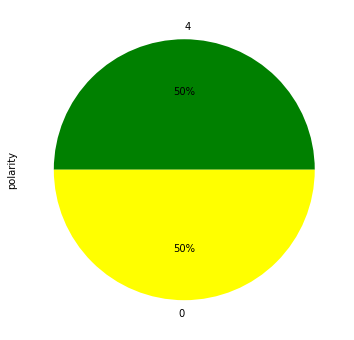

In [28]:
# Visualisation 
# On constate que contrairement à la documentation fournies avec le dataset, et aux labels annoncés, 
# il n'y a aucun texte labelisé comme neutre
plot_size = plt.rcParams["figure.figsize"] 
plot_size[0] = 8
plot_size[1] = 6
plt.rcParams["figure.figsize"] = plot_size 
df.polarity.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=["green", "yellow", "blue"])
plt.show()

In [38]:
# Répartition parfaite, match avec le camembert ci-dessus
df.describe
frequence_type = pd.crosstab(index=df['polarity'], columns = 'count')
frequence_type 

col_0,count
polarity,
0,800000
4,800000


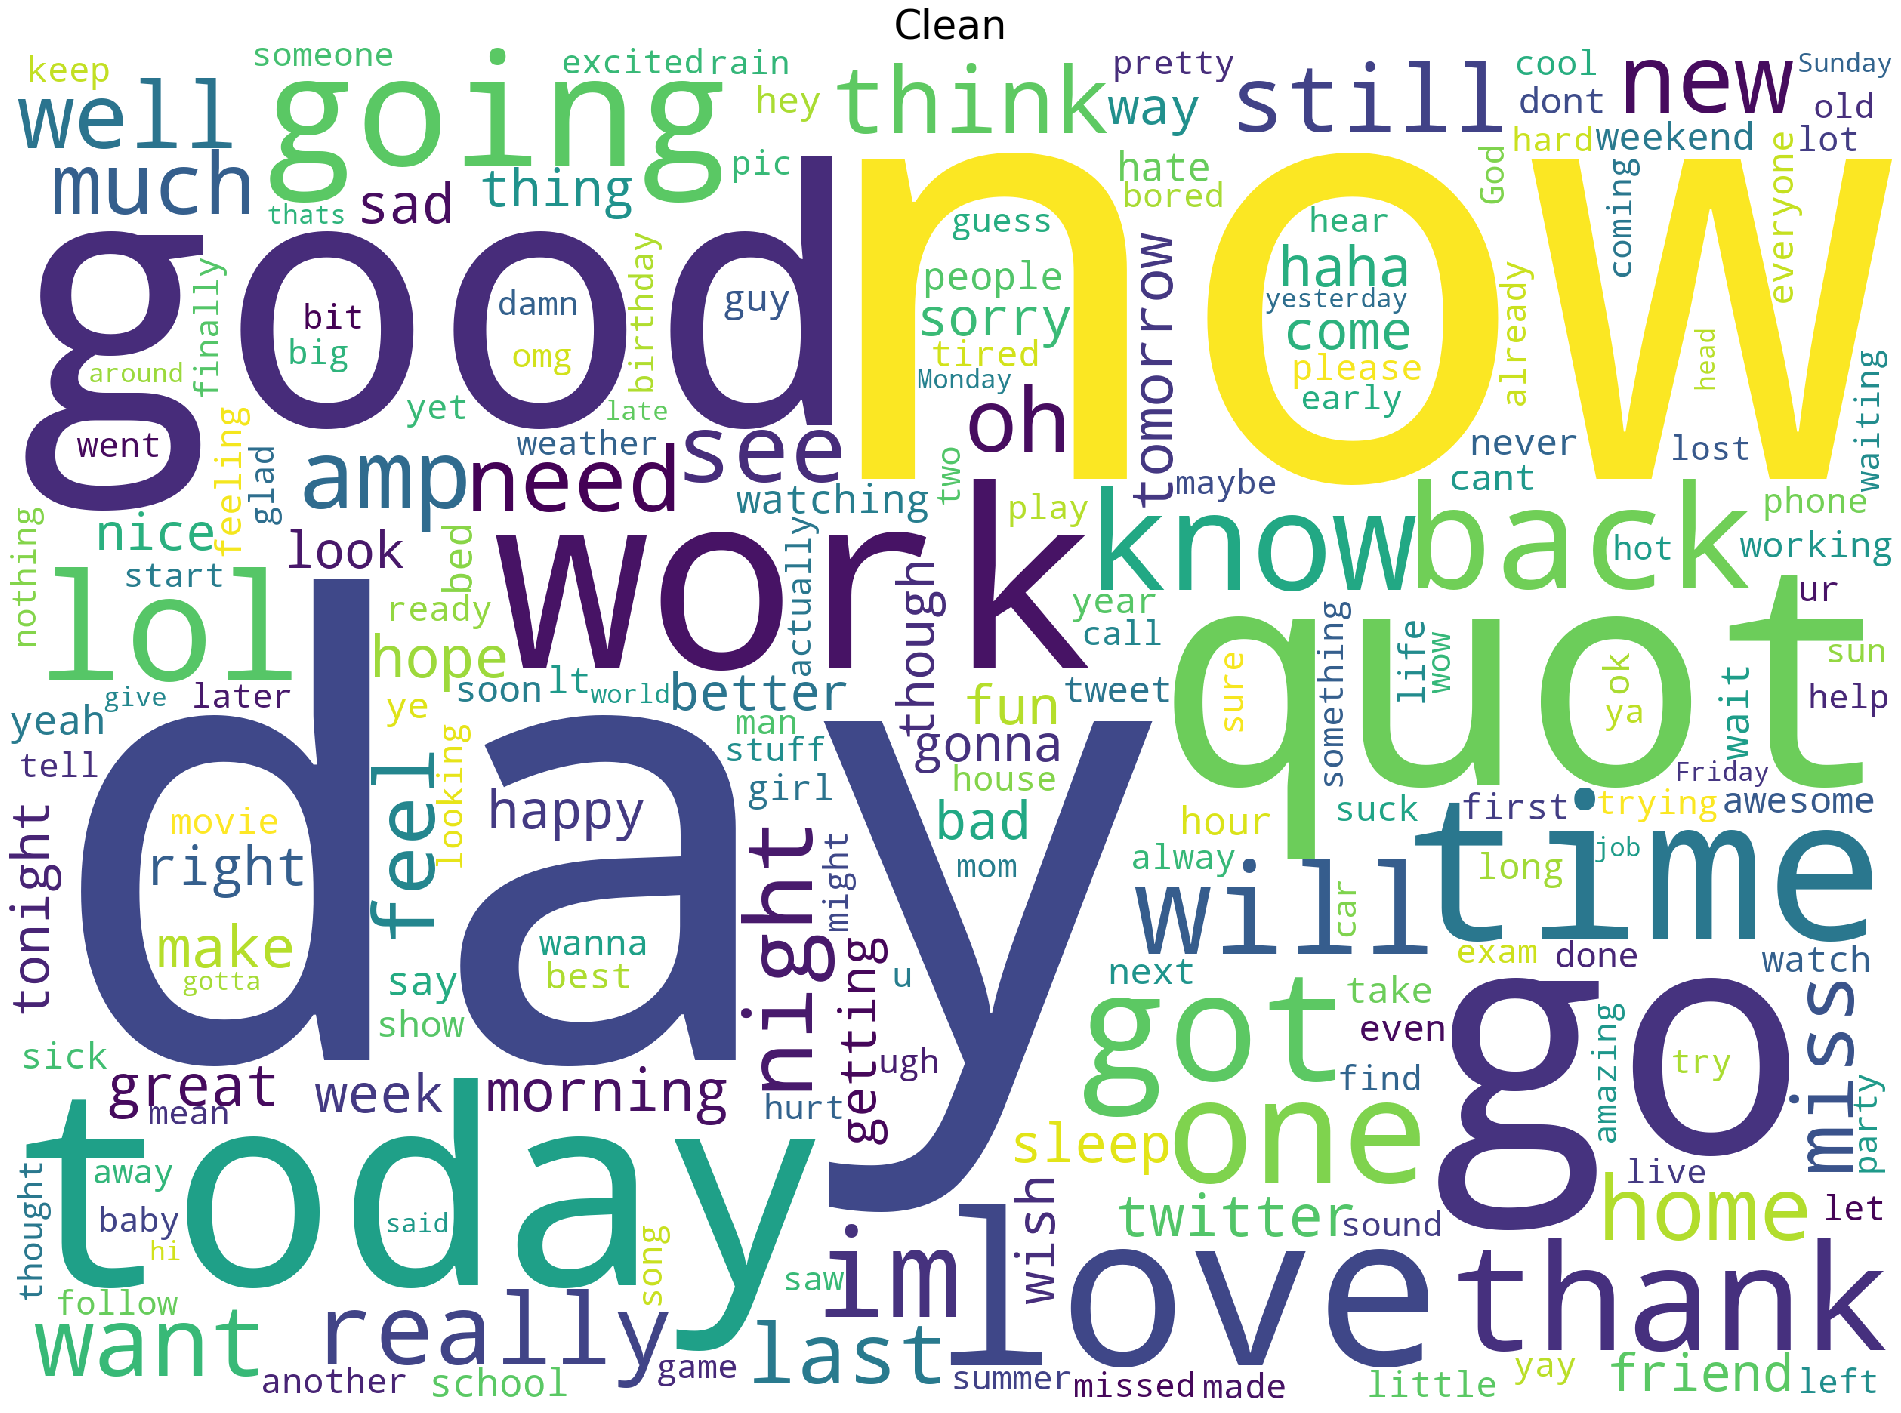

In [39]:
plt.figure(figsize=(40,25))
text = df.text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Clean",fontsize=40)
plt.imshow(cloud_toxic)
plt.show()

In [40]:
df_0 = df[df.polarity != 4]
df_4 = df[df.polarity != 0]

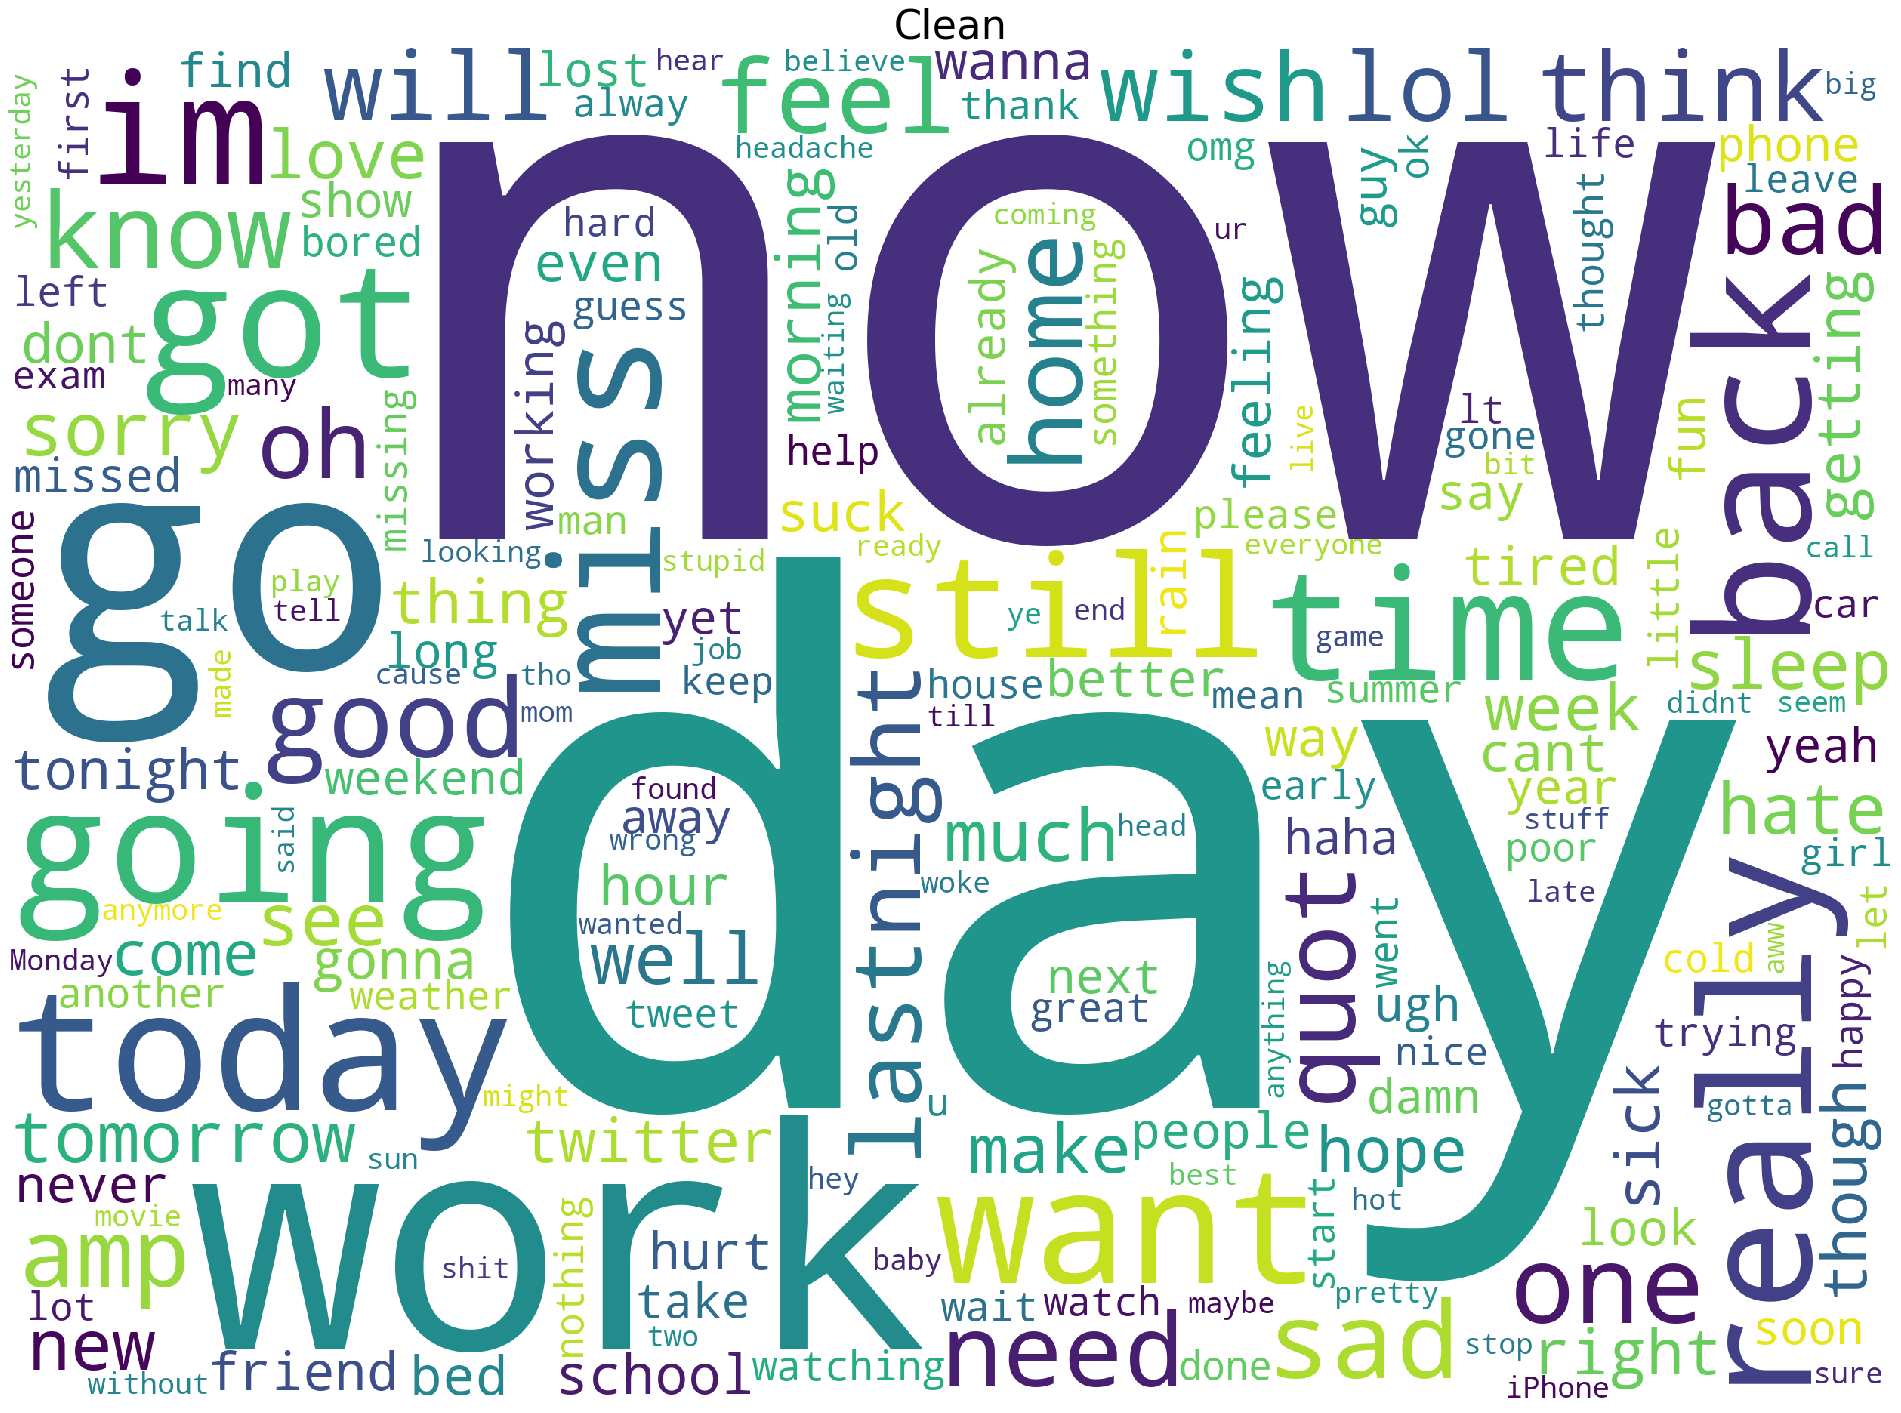

In [41]:
plt.figure(figsize=(40,25))
text = df_0.text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Clean",fontsize=40)
plt.imshow(cloud_toxic)
plt.show()

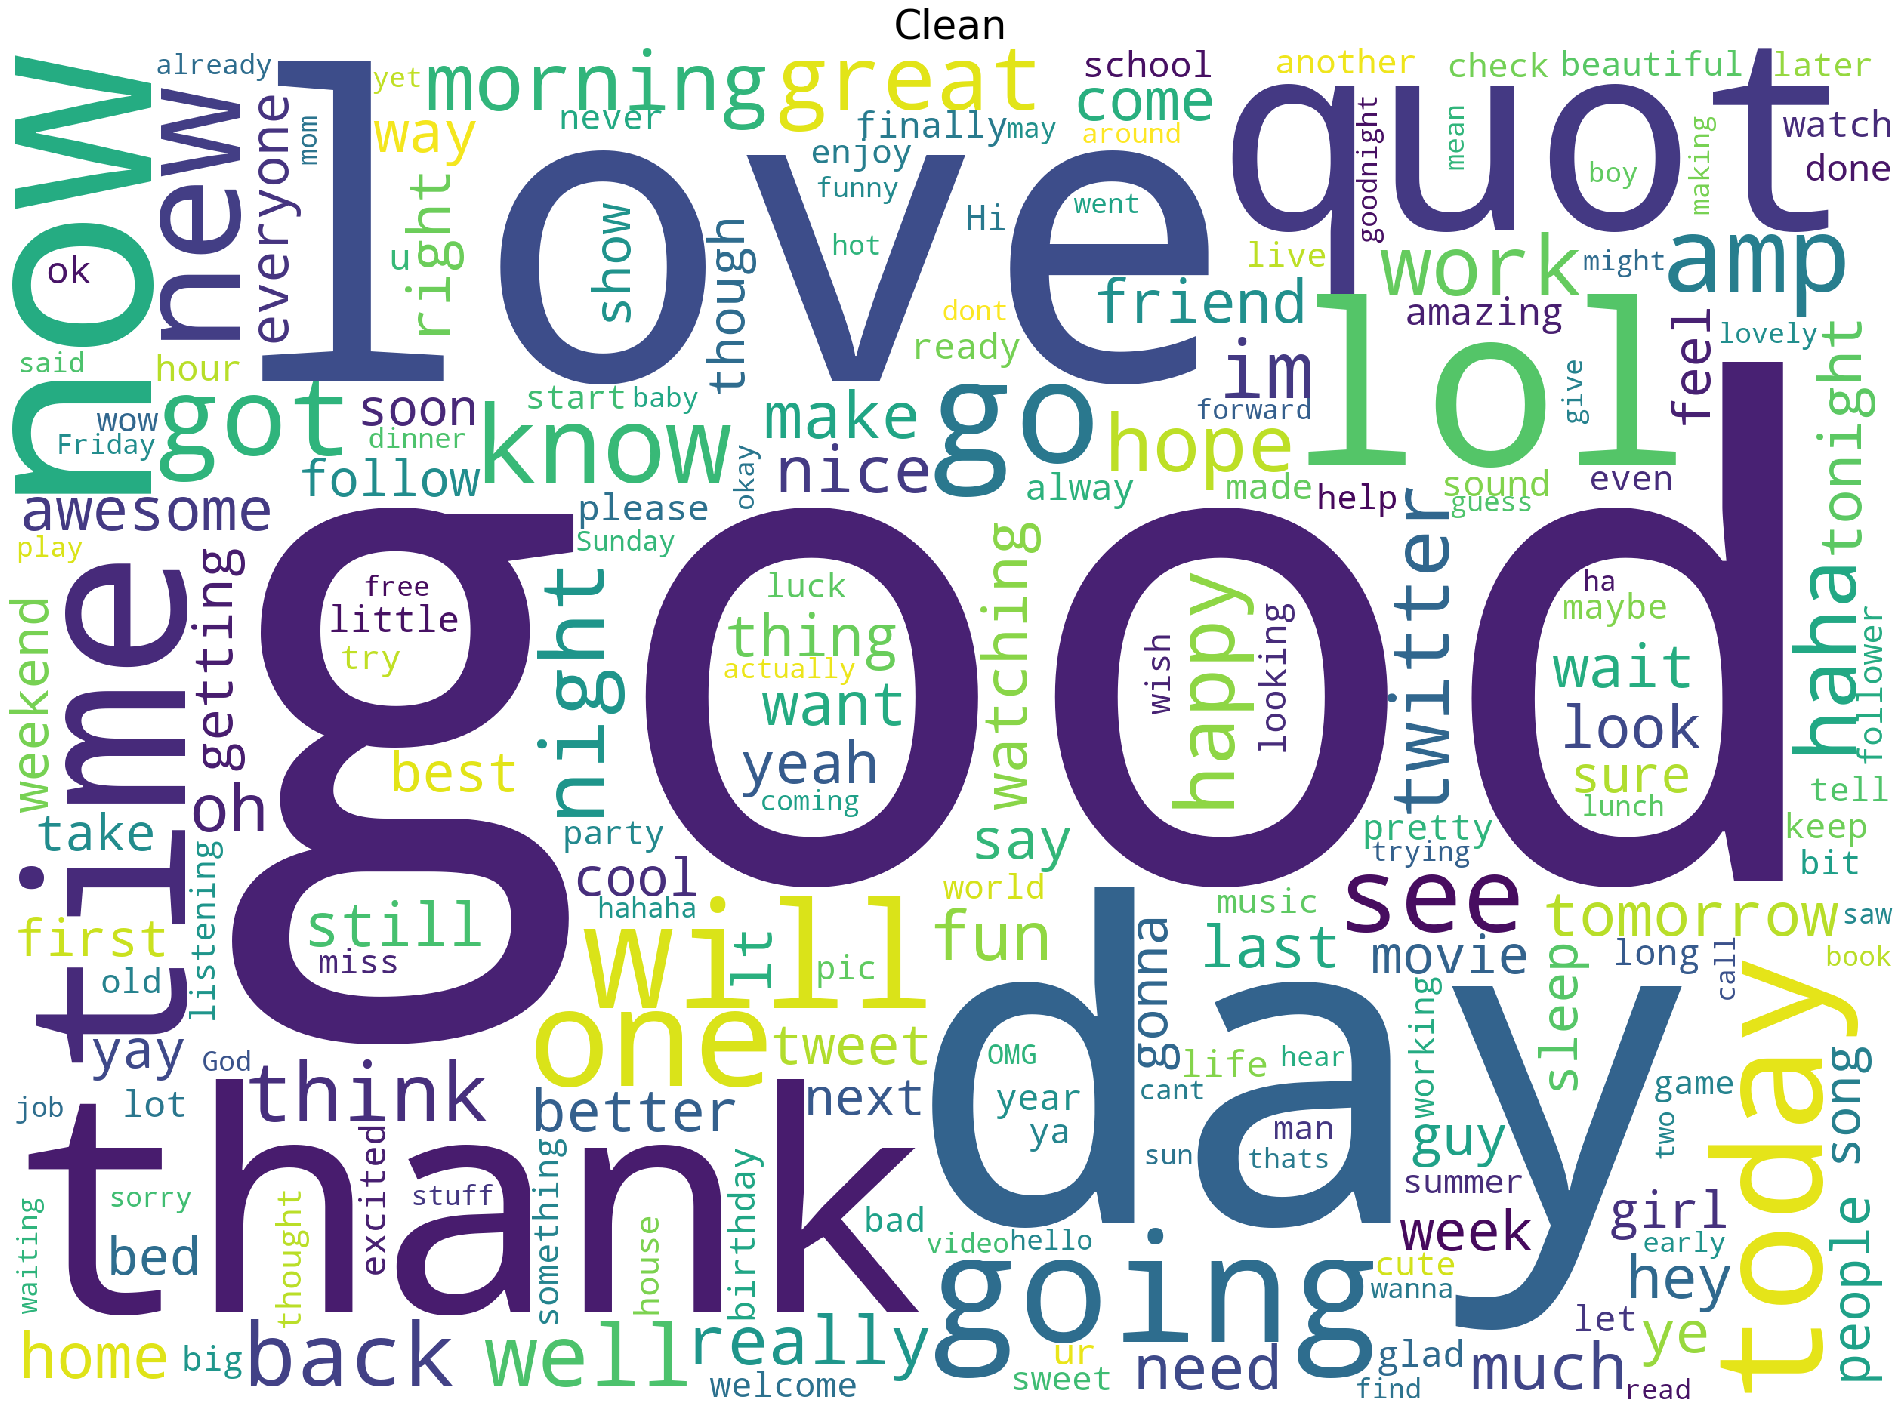

In [43]:
plt.figure(figsize=(40,25))
text = df_4.text.values
cloud_toxic = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          collocations=False,
                          width=2500,
                          height=1800
                         ).generate(" ".join(text))
plt.axis('off')
plt.title("Clean",fontsize=40)
plt.imshow(cloud_toxic)
plt.show()

In [44]:
def cleanHtml(sentence):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, ' ', str(sentence))
    return cleantext

def cleanPunc(sentence): #function to clean the word of any punctuation or special characters
    cleaned = re.sub(r'[?|!|\'|"|#]',r'',sentence)
    cleaned = re.sub(r'[.|,|)|(|\|/]',r' ',cleaned)
    cleaned = cleaned.strip()
    cleaned = cleaned.replace("\n"," ")
    return cleaned

def keepAlpha(sentence):
    alpha_sent = ""
    for word in sentence.split():
        alpha_word = re.sub('[^a-z A-Z]+', ' ', word)
        alpha_sent += alpha_word
        alpha_sent += " "
    alpha_sent = alpha_sent.strip()
    return alpha_sent

df['text'] = df['text'].str.lower()
df['text'] = df['text'].apply(cleanHtml)
df['text'] = df['text'].apply(cleanPunc)
df['text'] = df['text'].apply(keepAlpha)

In [45]:
df

,polarity,text
0,0,awww thats a bummer you shoulda got david carr...
1,0,is upset that he cant update his facebook by t...
2,0,i dived many times for the ball managed to sav...
3,0,my whole body feels itchy and like its on fire
4,0,no its not behaving at all im mad why am i her...
...,...,...
1599995,4,just woke up having no school is the best feel...
1599996,4,thewdb com very cool to hear old walt interv...
1599997,4,are you ready for your mojo makeover ask me fo...
1599998,4,happy th birthday to my boo of alll time tupa...


In [48]:
df['text'].head(40)
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]
df['text_lemmatizer'] = df.text.apply(lemmatize_text)

In [49]:
df.to_csv('proper_df.csv')

In [50]:
df

,polarity,text,text_lemmatizer
0,0,awww thats a bummer you shoulda got david carr...,"[awww, thats, a, bummer, you, shoulda, got, da..."
1,0,is upset that he cant update his facebook by t...,"[is, upset, that, he, cant, update, his, faceb..."
2,0,i dived many times for the ball managed to sav...,"[i, dived, many, time, for, the, ball, managed..."
3,0,my whole body feels itchy and like its on fire,"[my, whole, body, feel, itchy, and, like, it, ..."
4,0,no its not behaving at all im mad why am i her...,"[no, it, not, behaving, at, all, im, mad, why,..."
...,...,...,...
1599995,4,just woke up having no school is the best feel...,"[just, woke, up, having, no, school, is, the, ..."
1599996,4,thewdb com very cool to hear old walt interv...,"[thewdb, com, very, cool, to, hear, old, walt,..."
1599997,4,are you ready for your mojo makeover ask me fo...,"[are, you, ready, for, your, mojo, makeover, a..."
1599998,4,happy th birthday to my boo of alll time tupa...,"[happy, th, birthday, to, my, boo, of, alll, t..."
